In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
with Dataset("../Downloads/cami_0000-09-01_64x128_L26_c030918.nc") as ds:
    ps = ds.variables["PS"][:]
    p0 = ds.variables["P0"][:]
    temp = ds.variables["T"][:].squeeze()
    lev = ds.variables["lev"][:]
    print(ds.dimensions)
    
    
#double T(time, lat, lev, lon) ;
#        T:long_name = "Temperature" ;
#        T:units = "K" ;

OrderedDict([('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 64
), ('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 128
), ('lev', <class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 26
), ('ilev', <class 'netCDF4._netCDF4.Dimension'>: name = 'ilev', size = 27
), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1
), ('chars', <class 'netCDF4._netCDF4.Dimension'>: name = 'chars', size = 8
)])


In [3]:

# to generate tropo.so "f2py -m tropo"
import tropo

In [4]:
lev.shape

(26,)

In [5]:
temp = temp.transpose((2,0,1))

In [6]:
temp.shape

(128, 64, 26)

In [7]:
plimu = 45000
pliml = 7500
plimlex = 7500

t1 = temp[0, 0, :]
t1.shape = (1, 1, len(lev))
print(tropo.tropo(t1, lev, plimu, pliml, plimlex, 1))

(array([[ 22921.140625]], dtype=float32), 0)


In [8]:
print(tropo.tropo.__doc__)

tp,tperr = tropo(temp,pres,plimu,pliml,plimlex,dofill,[nlon,nlat,nlev])

Wrapper for ``tropo``.

Parameters
----------
temp : input rank-3 array('f') with bounds (nlon,nlat,nlev)
pres : input rank-1 array('f') with bounds (nlev)
plimu : input float
pliml : input float
plimlex : input float
dofill : input int

Other Parameters
----------------
nlon : input int, optional
    Default: shape(temp,0)
nlat : input int, optional
    Default: shape(temp,1)
nlev : input int, optional
    Default: shape(temp,2)

Returns
-------
tp : rank-2 array('f') with bounds (nlon,nlat)
tperr : int



In [9]:
t1

array([[[ 205.68383633,  200.63630374,  192.47655777,  182.08131805,
          181.88659838,  183.48890066,  184.59284941,  186.98495502,
          187.42124959,  187.66238082,  188.19148133,  188.15486339,
          188.47911683,  189.39009932,  191.90035982,  196.73685083,
          203.09406701,  209.72177402,  216.07416325,  223.40259776,
          229.74270036,  233.37960001,  235.50296151,  239.79477951,
          235.55691052,  230.02294253]]])

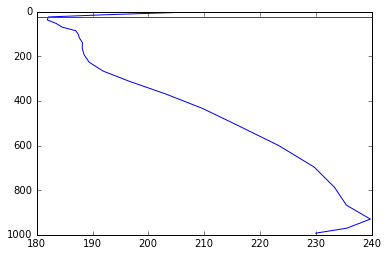

In [14]:
plt.plot(t1.squeeze(), lev)
plt.gca().invert_yaxis()
plt.plot([180, 240], [22.921, 22.921], "r")